In [1]:
!pip install torch.geometric

###We take a graph as input
- We will take the cora citation network as input and will try to see the various features in the dataset

In [2]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset=Planetoid(root='data/Planetoid',name='Cora',transform=NormalizeFeatures())
print()
print(dataset)

print("================================================")

print(f"Number of Graphs:{len(dataset)}")
print(f"Number of Features:{dataset.num_features}")
print(f"Number of Classes:{dataset.num_classes}")

#Lets explore the first graph object
data=dataset[0]
print()
print(data)
print("=================================================")

print(data.train_mask)

Processing...



Cora()
Number of Graphs:1
Number of Features:1433
Number of Classes:7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
tensor([ True,  True,  True,  ..., False, False, False])


Done!


In [3]:
Dataset=dataset[0]

In [4]:
Dataset.y.unique(),Dataset.train_mask.unique(),Dataset.val_mask.unique()

(tensor([0, 1, 2, 3, 4, 5, 6]), tensor([False,  True]), tensor([False,  True]))

###Define The GCN Network

In [5]:
import torch
import torch.nn as nn
from torch.nn import Linear,Softmax,CrossEntropyLoss
from torch.optim import Adam
import matplotlib.pyplot as plt

In [6]:
class GCN_Model(nn.Module):
  def __init__(self,A,X,hidden_channels):
    super().__init__()
    self.A=A
    self.X=X
    self.softmax=Softmax(dim=1)
    self.reLU=nn.ReLU()
    self.Linear1=Linear(dataset.num_features,hidden_channels)
    self.Linear2=Linear(hidden_channels,dataset.num_classes)


  def forward(self):
    x1=self.Linear1(torch.matmul(self.A,self.X))
    x1=self.reLU(x1)
    x2=self.Linear2(torch.matmul(self.A,x1))
    return self.softmax(x2)

###Define The Adjacency Matrix

In [7]:
### The Symmetric Normalized Adjacency Matrix
A=torch.zeros(size=(dataset[0].num_nodes,dataset[0].num_nodes))
for i in range(dataset[0].edge_index.shape[1]):
  A[dataset[0].edge_index[0][i],dataset[0].edge_index[1][i]]=1

A1=A+torch.eye(n=dataset[0].num_nodes)
D=torch.diag(torch.sum(A1,dim=1)) #D+I


D1=torch.sqrt(torch.linalg.inv(D)) #(D+I)^(-1/2)
W1=torch.matmul(D1,A1) #(D+I)^(-1/2)(A+I)
A=torch.matmul(W1,D1) #(D+I)^(-1/2)(A+I)*(D+I)^(-1/2)


###Define The Training Loop Over Multiple Layers

In [8]:
Criterion=CrossEntropyLoss()  #Using Cross Entropy Loss as the loss function
def train(model,optimizer):
  model.train() #Set the model in training mode
  optimizer.zero_grad() #Clear the gradients and set it to zero
  y_pred=model.forward() #Forward Pass
  loss=Criterion(y_pred[Dataset.train_mask],Dataset.y[dataset.train_mask]) #Calculate the loss in training mode
  loss.backward() #Compute the gradients
  optimizer.step() #Update the parameters
  return loss.item() #Return the loss

###16 Hidden Units

In [ ]:
model=GCN_Model(A,Dataset.x,hidden_channels=16)
optimizer=Adam(model.parameters(),lr=0.01)
epoches=200
training_loss=[]
for _ in range(epoches):
  training_loss.append(train(model,optimizer))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()
plt.show()

###Test Loop

In [9]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

def test(model):
  model.eval()  #Setting the model to evaluation mode
  y_out=model.forward() #Forward Pass
  y_pred=torch.argmax(y_out,dim=1) #Get the highest predicted class label

  #Convert the predicted and the true label to numpy for score calculation
  y_true=Dataset.y[Dataset.test_mask].cpu().numpy()
  y_pred=y_pred[Dataset.test_mask].cpu().numpy()

  #Calculate the scores
  print(f"Accuracy Score:{accuracy_score(y_pred,y_true)}")
  print(f"Precision Score:{precision_score(y_pred,y_true,average='weighted')}")
  print(f"Recall Score:{recall_score(y_pred,y_true,average='weighted')}")
  print(f"F1 Score:{f1_score(y_pred,y_true,average='weighted')}")

In [ ]:
test(model)

####32 Hidden Units

In [ ]:
model=GCN_Model(A,Dataset.x,hidden_channels=32)
optimizer=Adam(model.parameters(),lr=0.01)
epoches=200
training_loss=[]
for _ in range(epoches):
  training_loss.append(train(model,optimizer))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()
plt.show()

In [ ]:
test(model)

###Using 64 Hidden Units

In [ ]:
model=GCN_Model(A,Dataset.x,hidden_channels=64)
optimizer=Adam(model.parameters(),lr=0.01)
epoches=200
training_loss=[]
for _ in range(epoches):
  training_loss.append(train(model,optimizer))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()
plt.show()

In [ ]:
test(model)

###Using 128 Hidden Units

In [ ]:
model=GCN_Model(A,Dataset.x,hidden_channels=128)
optimizer=Adam(model.parameters(),lr=0.01)
epoches=200
training_loss=[]
for _ in range(epoches):
  training_loss.append(train(model,optimizer))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()
plt.show()

In [ ]:
test(model)

###Using 256 Hiddem Units

In [10]:
model=GCN_Model(A,Dataset.x,hidden_channels=256)
optimizer=Adam(model.parameters(),lr=0.01)
epoches=200
training_loss=[]
for _ in range(epoches):
  training_loss.append(train(model,optimizer))

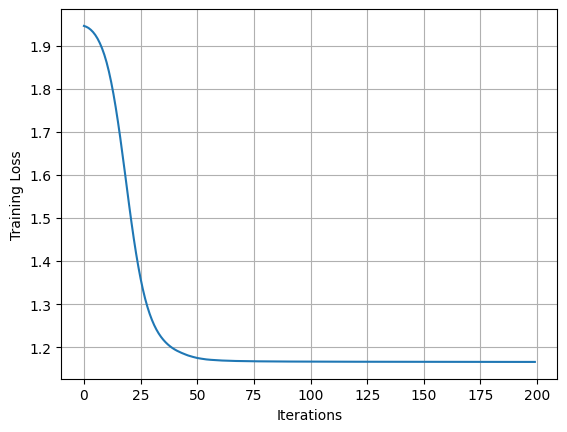

In [11]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()
plt.show()

In [12]:
test(model)

Accuracy Score:0.791
Precision Score:0.8033411652297973
Recall Score:0.791
F1 Score:0.7895881687519051


###Using 512 Hidden Units

In [ ]:
model=GCN_Model(A,Dataset.x,hidden_channels=512)
optimizer=Adam(model.parameters(),lr=0.01)
epoches=200
training_loss=[]
for _ in range(epoches):
  training_loss.append(train(model,optimizer))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()
plt.show()

In [ ]:
test(model)

###Using 1024 Hidden Units

In [ ]:
model=GCN_Model(A,Dataset.x,hidden_channels=1024)
optimizer=Adam(model.parameters(),lr=0.01)
epoches=200
training_loss=[]
for _ in range(epoches):
  training_loss.append(train(model,optimizer))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.grid()
plt.show()

In [ ]:
test(model)

###TSNE Visualizations

In [13]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

2.4.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


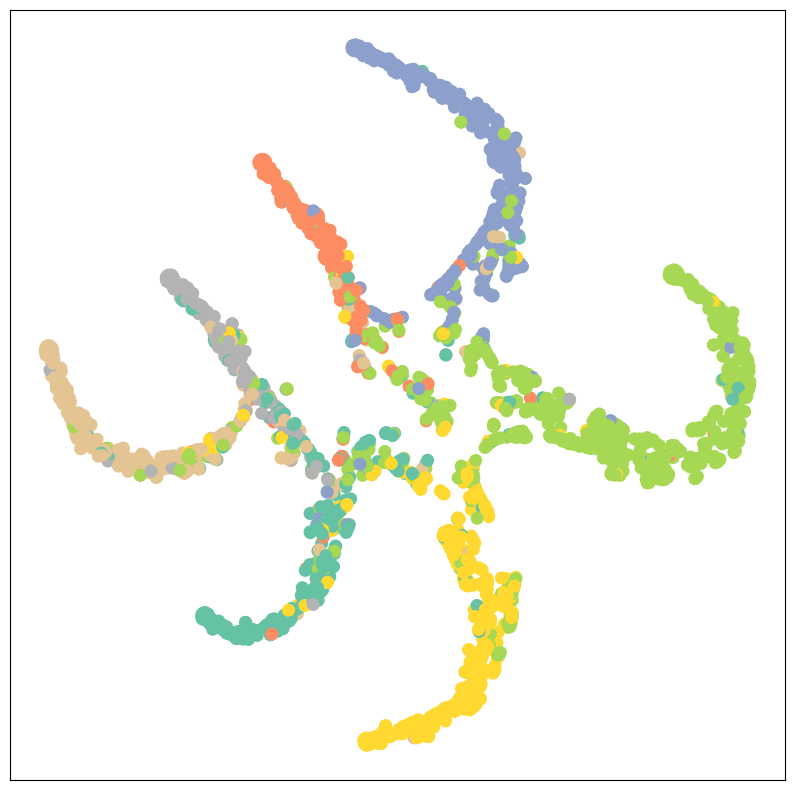

In [14]:
model.eval()

out = model.forward()
visualize(out, color=data.y)